<a href="https://colab.research.google.com/github/ashishpatel0720/ml/blob/code/dabble_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Data

In [83]:
resource - https://towardsdatascience.com/random-forest-vs-neural-networks-for-predicting-customer-churn-691666c7431e

SyntaxError: ignored

In [9]:
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, GRU
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import keras,tensorflow
import pandas as pd
import numpy as np
import sklearn 
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, chi2

base_path="./dabble7/"
data_path=base_path+"data/"
print(os.listdir(data_path))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)

df_train=pd.read_csv(data_path+"train_data.csv")
df_test=pd.read_csv(data_path+"test_data.csv")

df_train = df_train.fillna("")
df_test=df_test.fillna("") # can't drop from test_data as it will leave empty values in submit

df=pd.concat([df_train,df_test], axis =0).reset_index(drop=True)


vectType='TFIDF'
df.head(2)


%matplotlib inline


['sample_submission.csv', 'test_data.csv', 'train_data.csv']


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [10]:
print(np.__version__,pd.__version__)

1.18.5 0.23.4


In [11]:
print(keras.__version__,tensorflow.__version__)

2.3.1 1.14.0


# Data Processing

In [40]:
df_train=pd.read_csv(data_path+"train_data.csv")
df_test=pd.read_csv(data_path+"test_data.csv")
df=pd.concat([df_train,df_test], axis =0,sort=False).reset_index(drop=True) # check if the sort=False is required while splitting into train and test

df.head(2)

,key,age-range,job-status,marital,education,default,balance,housing,loan,contact,day,month,poutcome,campaign_1,campaign_2,label
0,1,30-39,employed,married,secondary,no,5.0,no,yes,cellular,4,aug,unknown,-41.202138,0.121576,0.0
1,2,18-29,student,single,secondary,no,4.0,no,no,cellular,29,jan,unknown,-41.199394,-0.878369,0.0


In [41]:
df.drop(['key'],axis = 1, inplace=True)
df.head(2)


,age-range,job-status,marital,education,default,balance,housing,loan,contact,day,month,poutcome,campaign_1,campaign_2,label
0,30-39,employed,married,secondary,no,5.0,no,yes,cellular,4,aug,unknown,-41.202138,0.121576,0.0
1,18-29,student,single,secondary,no,4.0,no,no,cellular,29,jan,unknown,-41.199394,-0.878369,0.0


In [42]:
 # z-score scaling 
from sklearn import preprocessing
df.campaign_1=preprocessing.scale(df.campaign_1)
df.campaign_2=preprocessing.scale(df.campaign_2)
df.head()


,age-range,job-status,marital,education,default,balance,housing,loan,contact,day,month,poutcome,campaign_1,campaign_2,label
0,30-39,employed,married,secondary,no,5.0,no,yes,cellular,4,aug,unknown,-0.411472,0.039398,0.0
1,18-29,student,single,secondary,no,4.0,no,no,cellular,29,jan,unknown,-0.411445,-0.284642,0.0
2,40-49,employed,single,unknown,no,5.0,no,no,unknown,19,jun,unknown,-0.411554,1.011518,0.0
3,30-39,employed,single,tertiary,no,4.0,yes,no,cellular,21,nov,other,1.386496,-0.441694,0.0
4,30-39,employed,single,tertiary,no,7.0,no,no,cellular,15,may,failure,1.375950,2.464033,0.0


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



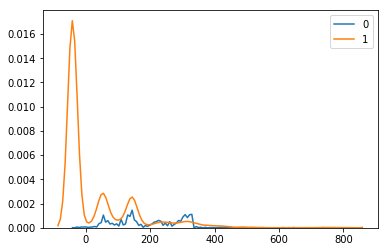

In [43]:
sns.kdeplot(df_train.loc[df_train['label'] == 0, 'campaign_1'], label='0') # relavent
sns.kdeplot(df_train.loc[df_train['label'] == 1, 'campaign_1'], label='1')

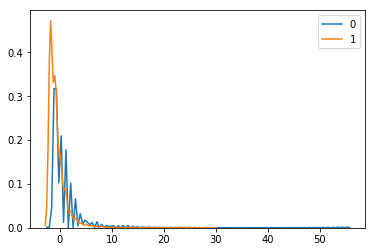

In [44]:
sns.kdeplot(df_train.loc[df_train['label'] == 0, 'campaign_2'], label='0') # not relavent removing
sns.kdeplot(df_train.loc[df_train['label'] == 1, 'campaign_2'], label='1')
df.drop(['campaign_2'],axis=1,inplace=True) # not making much a difference

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029D065C0>]],
      dtype=object)

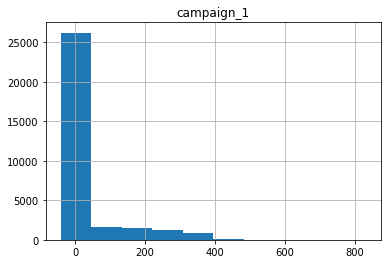

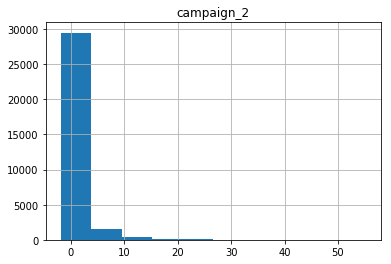

In [45]:
df_train.hist(column='campaign_1')
df_train.hist(column='campaign_2')

In [49]:
df.head()

,age-range,job-status,marital,education,default,balance,housing,loan,contact,day,month,poutcome,campaign_1,label
0,30-39,employed,married,secondary,no,5.0,no,yes,cellular,4,aug,unknown,-0.411472,0.0
1,18-29,student,single,secondary,no,4.0,no,no,cellular,29,jan,unknown,-0.411445,0.0
2,40-49,employed,single,unknown,no,5.0,no,no,unknown,19,jun,unknown,-0.411554,0.0
3,30-39,employed,single,tertiary,no,4.0,yes,no,cellular,21,nov,other,1.386496,0.0
4,30-39,employed,single,tertiary,no,7.0,no,no,cellular,15,may,failure,1.375950,0.0


In [50]:
df=pd.get_dummies(df,columns=['age-range','balance','contact','day','default','education','housing','job-status','loan','marital','month','poutcome'])
df.head()

,campaign_1,label,age-range_18-29,age-range_30-39,age-range_40-49,age-range_50-59,age-range_60-69,age-range_70+,balance_0.0,balance_1.0,balance_2.0,balance_3.0,balance_4.0,balance_5.0,balance_6.0,balance_7.0,balance_8.0,balance_9.0,contact_cellular,contact_telephone,contact_unknown,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,job-status_employed,job-status_retired,job-status_self-employed,job-status_student,job-status_unemployed,job-status_unknown,loan_no,loan_yes,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.411472,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.411445,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,-0.411554,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.386496,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1.375950,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [51]:
df.info() # no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 87 columns):
campaign_1                  45211 non-null float64
label                       31647 non-null float64
age-range_18-29             45211 non-null uint8
age-range_30-39             45211 non-null uint8
age-range_40-49             45211 non-null uint8
age-range_50-59             45211 non-null uint8
age-range_60-69             45211 non-null uint8
age-range_70+               45211 non-null uint8
balance_0.0                 45211 non-null uint8
balance_1.0                 45211 non-null uint8
balance_2.0                 45211 non-null uint8
balance_3.0                 45211 non-null uint8
balance_4.0                 45211 non-null uint8
balance_5.0                 45211 non-null uint8
balance_6.0                 45211 non-null uint8
balance_7.0                 45211 non-null uint8
balance_8.0                 45211 non-null uint8
balance_9.0                 45211 non-null uint8
conta

In [52]:
train = df[:len(df_train)]
train.label = train.label.astype(int)
test = df[len(df_train):].drop("label", axis= 1)

assert(train.shape[0]==31647)
assert(test.shape[0]==13564)

(train.shape,test.shape)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



((31647, 87), (13564, 86))

In [53]:
train['label'].value_counts() # imbalance

0    27974
1    3673 
Name: label, dtype: int64

In [54]:
train.head()

,campaign_1,label,age-range_18-29,age-range_30-39,age-range_40-49,age-range_50-59,age-range_60-69,age-range_70+,balance_0.0,balance_1.0,balance_2.0,balance_3.0,balance_4.0,balance_5.0,balance_6.0,balance_7.0,balance_8.0,balance_9.0,contact_cellular,contact_telephone,contact_unknown,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,job-status_employed,job-status_retired,job-status_self-employed,job-status_student,job-status_unemployed,job-status_unknown,loan_no,loan_yes,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.411472,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.411445,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,-0.411554,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.386496,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1.375950,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [55]:
X=train.drop('label',axis=1)
y=train['label']


In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
(X_train.shape,X_test.shape)

((44758, 86), (11190, 86))

In [59]:
y_resampled.value_counts() # reshampled count

1    27974
0    27974
Name: label, dtype: int64

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"


In [73]:
train.shape

(31647, 87)

In [109]:
from keras.layers import Dropout 
from keras.constraints import maxnorm
model = Sequential()
neurons=86
hidden_layers=2
epochs=100
earlystopping=EarlyStopping(monitor='val_loss',patience=10,mode=max)
checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, filepath = base_path+'yelp_lstm_gru_weights_dabble7.1.hdf5')

model.add(Dense(int(2*neurons), input_dim=86, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(neurons, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
model.summary()


C:\Users\pateash\AppData\Roaming\Python\Python37\site-packages\keras\callbacks\callbacks.py:788: RuntimeWarning:

EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 172)               14964     
_________________________________________________________________
dropout_7 (Dropout)          (None, 172)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 86)                14878     
_________________________________________________________________
dropout_8 (Dropout)          (None, 86)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 87        
Total params: 29,929
Trainable params: 29,929
Non-trainable params: 0
_________________________________________________________________


In [81]:
# model = Sequential()
# neurons=86
# hidden_layers=2
# epochs=30
# my_callbacks=[EarlyStopping(monitor='val_acc',patience=5,mode=max)]
# # note - in Dense layer every neuron is connected to every neuron in next layer
# #hidden layer 1(we have to provide input from input layer ( here 2(x and y cordinates)
# model.add(Dense(int(neurons*1.5), input_shape=(86,), activation='relu'))
# model.add(Dense(neurons,  activation='relu'))

# # output layer only neuron required
# model.add(Dense(1, activation='sigmoid'))

# #compile
# model.compile(Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()


In [110]:
hist = model.fit(X_train,y_train,epochs=epochs,batch_size=128,verbose=2,callbacks=my_callbacks, validation_split = .2) # 

Train on 35806 samples, validate on 8952 samples
Epoch 1/100
 - 2s - loss: 0.5762 - accuracy: 0.6989 - val_loss: 0.5465 - val_accuracy: 0.7284
Epoch 2/100


C:\Users\pateash\AppData\Roaming\Python\Python37\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning:

Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy



 - 1s - loss: 0.5378 - accuracy: 0.7355 - val_loss: 0.5199 - val_accuracy: 0.7441
Epoch 3/100
 - 1s - loss: 0.5130 - accuracy: 0.7544 - val_loss: 0.5007 - val_accuracy: 0.7564
Epoch 4/100
 - 1s - loss: 0.4892 - accuracy: 0.7671 - val_loss: 0.4770 - val_accuracy: 0.7680
Epoch 5/100
 - 1s - loss: 0.4672 - accuracy: 0.7803 - val_loss: 0.4556 - val_accuracy: 0.7826
Epoch 6/100
 - 1s - loss: 0.4505 - accuracy: 0.7902 - val_loss: 0.4475 - val_accuracy: 0.7880
Epoch 7/100
 - 2s - loss: 0.4352 - accuracy: 0.7993 - val_loss: 0.4319 - val_accuracy: 0.8021
Epoch 8/100
 - 2s - loss: 0.4203 - accuracy: 0.8074 - val_loss: 0.4225 - val_accuracy: 0.8036
Epoch 9/100
 - 1s - loss: 0.4063 - accuracy: 0.8150 - val_loss: 0.4113 - val_accuracy: 0.8105
Epoch 10/100
 - 1s - loss: 0.3946 - accuracy: 0.8193 - val_loss: 0.4036 - val_accuracy: 0.8111
Epoch 11/100
 - 2s - loss: 0.3834 - accuracy: 0.8260 - val_loss: 0.3914 - val_accuracy: 0.8257
Epoch 12/100
 - 2s - loss: 0.3760 - accuracy: 0.8309 - val_loss: 0.384

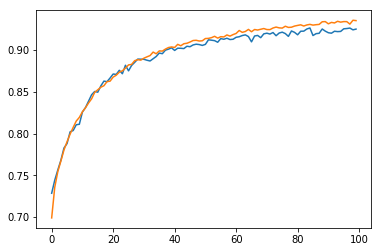

In [111]:
pd.Series(hist.history['val_accuracy']).plot()
pd.Series(hist.history['accuracy']).plot()

In [112]:
eval_result = model.evaluate(X_test,y_test)
#print accuracy
print("\n\n TestLoss: ",eval_result[0]," test Accuracy: ",eval_result[1])


y_predict = model.predict_classes(X_test)
y_predict.shape

11190/11190 [==============================] - 1s 52us/step


 TestLoss:  0.24503272068990567  test Accuracy:  0.9262734651565552


(11190, 1)

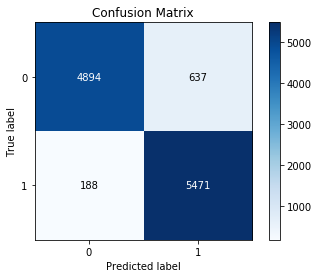

In [113]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predict)


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5531
           1       0.90      0.97      0.93      5659

    accuracy                           0.93     11190
   macro avg       0.93      0.93      0.93     11190
weighted avg       0.93      0.93      0.93     11190



In [115]:
# generating result
def generateOutputFile(classifier, classifier_name):
    output=[0 if i<=0.5 else 1 for i in classifier.predict(test)]
    key=pd.read_csv(data_path+"test_data.csv",usecols=['key'])
    result=pd.DataFrame(output,columns=['prediction'])
    result=pd.concat([key,result],axis=1)
#     print(result.head())
    fileName=base_path+"output/result_"+classifier_name+".csv"
    result.to_csv(fileName,index = False)
    print("Generated: "+fileName)

In [116]:
score="_TestLoss_"+str(round(eval_result[0],3))+"_TestAccuracy"+str(round(eval_result[1],3))
classifier_name="nn_ValSplit_hiddenlayers_"+str(hidden_layers)+"_neurons_"+str(neurons)+"_epochs_"+str(epochs)+score
model.save(base_path+classifier_name)
generateOutputFile(model,classifier_name)

Generated: ./dabble7/output/result_nn_ValSplit_hiddenlayers_2_neurons_86_epochs_100_TestLoss_0.245_TestAccuracy0.926.csv
